In [22]:
import torch
import torch.nn
import torchvision

from torch import nn
from torchvision import transforms

import matplotlib.pyplot as plt
import os
import random
print(f"torch version : {torch.__version__}")

torch version : 2.4.1


In [23]:
!nvidia-smi

Wed Oct 30 22:41:56 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090 Ti   WDDM  |   00000000:01:00.0  On |                  Off |
|  0%   44C    P8             19W /  480W |     496MiB /  24564MiB |     12%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [25]:
image_path = "C:\junha\Personal_Notebook\data"

In [26]:
# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from pytorch_modules.pytorch_modules import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/DutchVandaline/Artificial_Intelligence.git
    !mv Artificial_Intelligence/pytorch_modules .
    !mv Artificial_Intelligence/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from pytorch_modules.pytorch_modules import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

In [27]:
# Count Image Data length
import os
def walk_through_dir(dir_path):
  """ Walks through dir_path returning its conents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directoreis and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(image_path)

There are 2 directoreis and 0 images in 'C:\junha\Personal_Notebook\data'.
There are 2 directoreis and 0 images in 'C:\junha\Personal_Notebook\data\test'.
There are 0 directoreis and 397 images in 'C:\junha\Personal_Notebook\data\test\defect'.
There are 0 directoreis and 46 images in 'C:\junha\Personal_Notebook\data\test\normal'.
There are 2 directoreis and 0 images in 'C:\junha\Personal_Notebook\data\train'.
There are 0 directoreis and 1585 images in 'C:\junha\Personal_Notebook\data\train\defect'.
There are 0 directoreis and 182 images in 'C:\junha\Personal_Notebook\data\train\normal'.


In [28]:
# Cut train image's normal data into 221
from shutil import copyfile
from pathlib import Path

defect_dir = Path("C:/junha/Personal_Notebook/data/train/defect")
normal_dir = Path("C:/junha/Personal_Notebook/data/train/normal")

defect_images = os.listdir(defect_dir)

selected_images = random.sample(defect_images, 182)

undersampling_train_dir = 'C:/junha/Personal_Notebook/undersampling_data/undersampling_train'
os.makedirs(undersampling_train_dir, exist_ok=True)

undersampling_train_defect_dir = os.path.join(undersampling_train_dir, 'defect')
os.makedirs(undersampling_train_defect_dir, exist_ok=True)

for image_name in selected_images:
    src_path = os.path.join(defect_dir, image_name)
    dst_path = os.path.join(undersampling_train_defect_dir, image_name)
    copyfile(src_path, dst_path)

undersampling_train_normal_dir = os.path.join(undersampling_train_dir, 'normal')
os.makedirs(undersampling_train_normal_dir, exist_ok=True)

normal_images = os.listdir(normal_dir)
for image_name in normal_images:
    src_path = os.path.join(normal_dir, image_name)
    dst_path = os.path.join(undersampling_train_normal_dir, image_name)
    copyfile(src_path, dst_path)
print("Undersampled data made")

Undersampled data made


In [29]:
# Cut train image's normal data into 221
from shutil import copyfile
from pathlib import Path

defect_dir = Path("C:/junha/Personal_Notebook/data/test/defect")
normal_dir = Path("C:/junha/Personal_Notebook/data/test/normal")

defect_images = os.listdir(defect_dir)

selected_images = random.sample(defect_images, 46)

undersampling_test_dir = 'C:/junha/Personal_Notebook/undersampling_data/undersampling_test'
os.makedirs(undersampling_test_dir, exist_ok=True)

undersampling_test_defect_dir = os.path.join(undersampling_test_dir, 'defect')
os.makedirs(undersampling_test_defect_dir, exist_ok=True)

for image_name in selected_images:
    src_path = os.path.join(defect_dir, image_name)
    dst_path = os.path.join(undersampling_test_defect_dir, image_name)
    copyfile(src_path, dst_path)

undersampling_test_normal_dir = os.path.join(undersampling_test_dir, 'normal')
os.makedirs(undersampling_test_normal_dir, exist_ok=True)

normal_images = os.listdir(normal_dir)
for image_name in normal_images:
    src_path = os.path.join(normal_dir, image_name)
    dst_path = os.path.join(undersampling_test_normal_dir, image_name)
    copyfile(src_path, dst_path)
print("Undersampled data made")

Undersampled data made


In [30]:
undersampling_image_path = 'C:/junha/Personal_Notebook/undersampling_data'

In [31]:
# Count Image Data length
import os
def walk_through_dir(dir_path):
  """ Walks through dir_path returning its conents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directoreis and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(undersampling_image_path)

There are 2 directoreis and 0 images in 'C:/junha/Personal_Notebook/undersampling_data'.
There are 2 directoreis and 0 images in 'C:/junha/Personal_Notebook/undersampling_data\undersampling_test'.
There are 0 directoreis and 46 images in 'C:/junha/Personal_Notebook/undersampling_data\undersampling_test\defect'.
There are 0 directoreis and 46 images in 'C:/junha/Personal_Notebook/undersampling_data\undersampling_test\normal'.
There are 2 directoreis and 0 images in 'C:/junha/Personal_Notebook/undersampling_data\undersampling_train'.
There are 0 directoreis and 182 images in 'C:/junha/Personal_Notebook/undersampling_data\undersampling_train\defect'.
There are 0 directoreis and 182 images in 'C:/junha/Personal_Notebook/undersampling_data\undersampling_train\normal'.


In [32]:
efficientNet_weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
efficientNet = torchvision.models.efficientnet_b0(weights=efficientNet_weights)
efficientNet

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [33]:
# Get the transforms used to create our pretrained weights
auto_transforms = efficientNet_weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [34]:
#Set up dataloaders
from pytorch_modules.pytorch_modules import data_setup
undersampling_train_dataloader, undersampling_test_dataloader, class_names = data_setup.create_dataloaders(train_dir=undersampling_train_dir,
                                                                                                     test_dir=undersampling_test_dir,
                                                                                                     transform=auto_transforms,
                                                                                                     batch_size=32)
len(class_names)

2

In [35]:
# Update the classifier head of our model to suit our problem
torch.manual_seed(42)
torch.cuda.manual_seed(42)

efficientNet.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280, #feature vector coming in
              out_features=len(class_names))
).to(device)

efficientNet.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=2, bias=True)
)

In [36]:
# Freeze all of the base layers
for param in efficientNet.features.parameters():
  param.requires_grad = False

In [37]:
# Print with torchinfo
from torchinfo import summary

summary(model = efficientNet,
        input_size = (1,3,2732,824), # example of [batch_size, color_channels, height, width]
        col_names = ["input_size", "output_size", "num_params", "trainable"],
        col_width = 15,
        row_settings=['var_names'])

Layer (type (var_name))                                      Input Shape     Output Shape    Param #         Trainable
EfficientNet (EfficientNet)                                  [1, 3, 2732, 824] [1, 2]          --              Partial
├─Sequential (features)                                      [1, 3, 2732, 824] [1, 1280, 86, 26] --              False
│    └─Conv2dNormActivation (0)                              [1, 3, 2732, 824] [1, 32, 1366, 412] --              False
│    │    └─Conv2d (0)                                       [1, 3, 2732, 824] [1, 32, 1366, 412] (864)           False
│    │    └─BatchNorm2d (1)                                  [1, 32, 1366, 412] [1, 32, 1366, 412] (64)            False
│    │    └─SiLU (2)                                         [1, 32, 1366, 412] [1, 32, 1366, 412] --              --
│    └─Sequential (1)                                        [1, 32, 1366, 412] [1, 16, 1366, 412] --              False
│    │    └─MBConv (0)                     

In [38]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(efficientNet.parameters(), lr= 0.001)

In [39]:
from pytorch_modules.pytorch_modules import engine

# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
start_time = timer()

results = engine.train(model=efficientNet,
                       train_dataloader=undersampling_train_dataloader,
                       test_dataloader =undersampling_test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time: .3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6283 | train_acc: 0.6753 | test_loss: 0.5770 | test_acc: 0.8021
Epoch: 2 | train_loss: 0.5002 | train_acc: 0.8472 | test_loss: 0.4369 | test_acc: 0.8958
Epoch: 3 | train_loss: 0.4260 | train_acc: 0.8993 | test_loss: 0.3585 | test_acc: 0.9167
Epoch: 4 | train_loss: 0.3634 | train_acc: 0.9253 | test_loss: 0.3055 | test_acc: 0.9479
Epoch: 5 | train_loss: 0.3269 | train_acc: 0.9184 | test_loss: 0.2704 | test_acc: 0.9688
Epoch: 6 | train_loss: 0.2996 | train_acc: 0.9201 | test_loss: 0.2413 | test_acc: 0.9688
Epoch: 7 | train_loss: 0.2673 | train_acc: 0.9462 | test_loss: 0.2254 | test_acc: 0.9688
Epoch: 8 | train_loss: 0.2663 | train_acc: 0.9583 | test_loss: 0.2071 | test_acc: 0.9688
Epoch: 9 | train_loss: 0.2314 | train_acc: 0.9523 | test_loss: 0.2072 | test_acc: 0.9479
Epoch: 10 | train_loss: 0.2006 | train_acc: 0.9696 | test_loss: 0.1803 | test_acc: 0.9688
[INFO] Total training time:  194.255 seconds


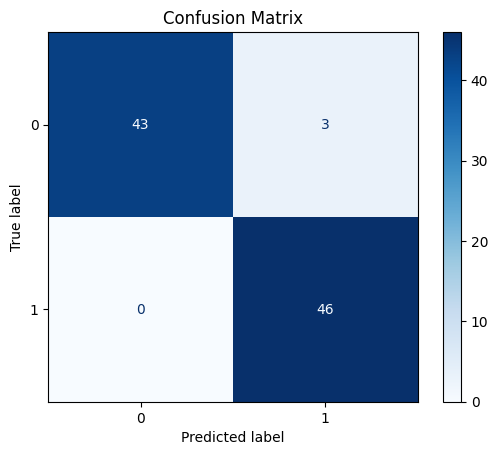

In [41]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Ensure the model is in evaluation mode
efficientNet.eval()

# Create lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Move model to the appropriate device (e.g., CPU or GPU)
efficientNet.to(device)

# Disable gradient calculation for evaluation
with torch.no_grad():
    for data in undersampling_test_dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = efficientNet(inputs)
        _, preds = torch.max(outputs, 1)

        # Collect predictions and true labels
        predicted_labels.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


F1 Score (Micro): 0.967391304347826
F1 Score (Macro): 0.9673565937315198


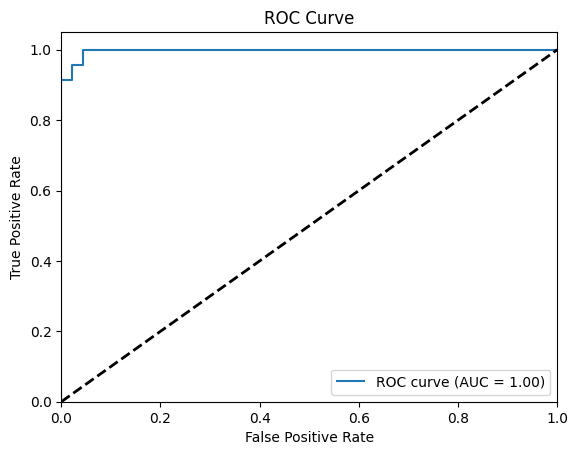

In [42]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_curve, auc
import numpy as np
from sklearn.preprocessing import label_binarize

# Ensure the model is in evaluation mode and move it to the appropriate device
efficientNet.to(device)
efficientNet.eval()

# Create lists to store true and predicted labels
true_labels = []
predicted_labels = []
all_probabilities = []

# Disable gradient calculation for evaluation
with torch.no_grad():
    for data in undersampling_test_dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = efficientNet(inputs)
        _, preds = torch.max(outputs, 1)

        # Collect predictions, true labels, and predicted probabilities
        predicted_labels.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
        all_probabilities.extend(torch.softmax(outputs, dim=1).cpu().numpy())

# Calculate F1 score (micro and macro)
f1_micro = f1_score(true_labels, predicted_labels, average='micro')
f1_macro = f1_score(true_labels, predicted_labels, average='macro')
print(f"F1 Score (Micro): {f1_micro}")
print(f"F1 Score (Macro): {f1_macro}")

# Determine if it's binary or multi-class
num_classes = len(np.unique(true_labels))

if num_classes == 2:
    # Binary classification: Use only one ROC curve
    fpr, tpr, _ = roc_curve(true_labels, np.array(all_probabilities)[:, 1])
    roc_auc = auc(fpr, tpr) 

    # Plot ROC curve for binary classification
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
else:
    # Multi-class classification: ROC curve for each class
    true_labels_binarized = label_binarize(true_labels, classes=np.arange(num_classes))

    # Plot ROC curve for each class
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(true_labels_binarized[:, i], np.array(all_probabilities)[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
